In [5]:
# Import standard libraries
import os
import sys
import importlib
import datetime as dt
import time
from pathlib import Path
from contextlib import redirect_stdout

# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import custom modules - NEED WINDOWS OS
import AuxFunctions as af, cs3, csPlots, cs_util as util, dss3_functions_reference as dss

OSError: dlopen(../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll, 0x0006): tried: '../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OS../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/Users/canruso/opt/anaconda3/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/canruso/opt/anaconda3/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/Users/canruso/opt/anaconda3/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/canruso/opt/anaconda3/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/Users/canruso/opt/anaconda3/lib/python3.9/lib-dynload/../../../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/Users/canruso/opt/anaconda3/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/canruso/opt/anaconda3/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/Users/canruso/opt/anaconda3/bin/../lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file), '/usr/lib/../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file, not in dyld cache), '../ExcelDSSAdd-inPackage_Feb2016/libraries/64-bit/heclib_x64.dll' (no such file)

## Read Studies

In [3]:
listfp = r'../dss_april2024/Exploratory_Results_v02b/callite_expl02b_run_listing.xlsx'
dsshdr, dssname = af.read_from_excel(listfp, 'callite_expl02b_run_listing','A1','A385',hdr=True)

In [4]:
# NEW construct the name of the dss file
dss_names = []
for i in range(len(dssname)):
    dss_names.append(dssname[i][0] + '_DV.dss')
dss_names

['expl0000_DV.dss',
 'expl0001_DV.dss',
 'expl0002_DV.dss',
 'expl0003_DV.dss',
 'expl0004_DV.dss',
 'expl0005_DV.dss',
 'expl0006_DV.dss',
 'expl0007_DV.dss',
 'expl0008_DV.dss',
 'expl0009_DV.dss',
 'expl0010_DV.dss',
 'expl0011_DV.dss',
 'expl0012_DV.dss',
 'expl0013_DV.dss',
 'expl0014_DV.dss',
 'expl0015_DV.dss',
 'expl0016_DV.dss',
 'expl0017_DV.dss',
 'expl0018_DV.dss',
 'expl0019_DV.dss',
 'expl0020_DV.dss',
 'expl0021_DV.dss',
 'expl0022_DV.dss',
 'expl0023_DV.dss',
 'expl0024_DV.dss',
 'expl0025_DV.dss',
 'expl0026_DV.dss',
 'expl0027_DV.dss',
 'expl0028_DV.dss',
 'expl0029_DV.dss',
 'expl0030_DV.dss',
 'expl0031_DV.dss',
 'expl0032_DV.dss',
 'expl0033_DV.dss',
 'expl0034_DV.dss',
 'expl0035_DV.dss',
 'expl0036_DV.dss',
 'expl0037_DV.dss',
 'expl0038_DV.dss',
 'expl0039_DV.dss',
 'expl0040_DV.dss',
 'expl0041_DV.dss',
 'expl0042_DV.dss',
 'expl0043_DV.dss',
 'expl0044_DV.dss',
 'expl0045_DV.dss',
 'expl0046_DV.dss',
 'expl0047_DV.dss',
 'expl0048_DV.dss',
 'expl0049_DV.dss',


In [5]:
dss_df = (pd.DataFrame(dss_names))
dss_df.to_csv("EDA_04_01_24_dss_names.csv")

## Read variables

In [ ]:
# Excel file with listing of variables (B & C parts)
xlfp = r'../Selected Studies and Variables/apr01_variables.xlsx'
xltab = r'April EDA'

# launch file path to example CalLite (or CalSim) study
launch_base_directory = r'../dss_april2024/Exploratory_Results_v02b'
outdir = os.path.dirname(launch_base_directory)  

hdr, vars = af.read_from_excel(xlfp, xltab,'B1','C37',hdr=True)
var_df = pd.DataFrame(data=vars, columns=hdr)

In [ ]:
var_df

In [ ]:
var_df.to_csv("EDA_vars_04_01_24.csv")

## Create datasets across studies


In [ ]:
def preprocess_data_dss(df, addsl=False, addres = True, addpump = True):
    dvar_list = []
    combined_df = pd.DataFrame()
    TAF_MO_PER_CFS = 60.3707 / 1000
    
    for i, r in df.iterrows():
        dvar_list.append(f'/{r["DSS Part B"]}/{r["DSS Part C"]}/')

    for dss_name in dss_names:

        print(dss_name)

        # Create a blank python "calsim" object
        thiscs3 = cs3.calsim()

        # add start and end dates (MAKE THESE DATES PARAMETERS WITH THESE DATES AS DEFAULTS)
        thiscs3.StartDate = dt.datetime(1921,10,31)
        thiscs3.EndDate = dt.datetime(2003,9,30)

        # add path to DSS (CURRENTLY EXPECTING DSS IN THE BASE DIRECTORY, BUT WE SHOULD MAKE IT A PARAMETER)
        DSS_FP = os.path.join(launch_base_directory, dss_name)
        thiscs3.DV_FP = DSS_FP

        # Retrieve the DSS data variables from the DSS file
        thiscs3.DVdata = cs3.csDVdata(thiscs3)
        thiscs3.DVdata.getDVts(filter=dvar_list)

        df = thiscs3.DVdata.DVtsDF.copy(deep=True)

        # if storage add the 2 variables to create a new one
        # Add S_SLSCVP and S_SLSWP into S_SLTOT

        if addsl:
            df[('CALLITE', 'S_SLTOT', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,[('CALLITE', 'S_SLCVP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'),('CALLITE', 'S_SLSWP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')]].sum(axis=1)

        if addpump:
            df[('CALLITE', 'D_JONES_TAF', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,('CALLITE', 'D_JONES', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'CFS')] * TAF_MO_PER_CFS
            df[('CALLITE', 'D_BANKS_TAF', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,('CALLITE', 'D_BANKS', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'CFS')] * TAF_MO_PER_CFS
            df[('CALLITE', 'D_TOT', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,[('CALLITE', 'D_JONES_TAF', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'TAF'),('CALLITE', 'D_BANKS_TAF', 'FLOW-DELIVERY', '1MON', '2020D09E', 'PER-AVER', 'TAF')]].sum(axis=1)

        if addres:
            df[('CALLITE', 'S_RESTOT', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,[('CALLITE', 'S_OROVL', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'),('CALLITE', 'S_MELON', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'), ('CALLITE', 'S_SHSTA', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'), ('CALLITE', 'S_MLRTN', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'), ('CALLITE', 'S_TRNTY', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')]].sum(axis=1)

        new_columns = [(col[0], f'{col[1]}_{dss_name[:-7]}', *col[2:]) if len(col) > 1 else (col[0], '') for col in df.columns]
        df.columns = pd.MultiIndex.from_tuples(new_columns)
        df.columns.names = ['A', 'B', 'C', 'D', 'E', 'F', 'Units']
        combined_df = pd.concat([combined_df, df], axis=1)

    return combined_df

In [ ]:
df = preprocess_data_dss(var_df)

In [ ]:
df.head(5)

## NOTE: DEL_CVP_PEX_S is not being read!!

In [ ]:
df.to_csv("EDA_data_04_01_24_v2.csv", header=True, index=True)

### MAC USERS/THOSE WITH DATA START HERE

In [6]:
df_wy = pd.read_csv("wytypestable.csv")
df_wy

,WATERYEAR,SACindex_0,SJRindex_0,SHASTAindex_0,AmerD893_0,FEATHERindex_0,Trinityindex_0,Amer403030_0,SACindex_1,SJRindex_1,...,Trinityindex_9,Amer403030_9,SACindex_10,SJRindex_10,SHASTAindex_10,AmerD893_10,FEATHERindex_10,Trinityindex_10,Amer403030_10,DriestYrs
0,1920,2,2,1,1,0,3,2,2,2,...,3,2,2,2,1,1,0,3,2,0
1,1921,2,2,1,1,0,3,2,2,2,...,3,2,2,2,1,1,0,3,2,0
2,1922,2,1,1,1,0,4,2,2,2,...,3,2,1,1,1,1,0,4,2,0
3,1923,3,2,3,1,0,4,3,4,3,...,4,3,3,2,3,1,0,4,3,0
4,1924,5,5,4,2,1,5,6,5,5,...,5,6,5,5,4,2,1,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1999,1,2,1,1,0,2,0,1,3,...,1,0,1,2,1,1,0,2,0,0
80,2000,2,2,1,1,0,2,0,2,3,...,1,0,2,3,1,1,0,1,0,0
81,2001,4,4,1,2,0,4,0,5,5,...,3,0,4,5,2,2,0,4,0,0
82,2003,2,3,1,1,0,2,0,3,5,...,1,0,3,5,1,1,0,1,0,0


In [7]:
baseline_cols = [col for col in df_wy.columns if col.endswith('_0')]
baseline_cols.append("WATERYEAR")
df_wy_filter = df_wy[baseline_cols]
df_wy_filter.head(5)

,SACindex_0,SJRindex_0,SHASTAindex_0,AmerD893_0,FEATHERindex_0,Trinityindex_0,Amer403030_0,WATERYEAR
0,2,2,1,1,0,3,2,1920
1,2,2,1,1,0,3,2,1921
2,2,1,1,1,0,4,2,1922
3,3,2,3,1,0,4,3,1923
4,5,5,4,2,1,5,6,1924


In [24]:
df = pd.read_csv("EDA_data_04_01_24_v2.csv", header=[0, 1, 2, 3, 4, 5, 6], index_col=0, parse_dates=True)
df = df.loc[:, ~df.columns.get_level_values(6).str.contains('CFS.1')]
var_df = pd.read_csv("EDA_vars_04_01_24.csv")
dss_names = pd.read_csv("dss_names.csv")["0"].tolist()
df.head(5)
var_list = var_df["DSS Part B"].tolist()

In [25]:
var_df

,Unnamed: 0,DSS Part B,DSS Part C
0,0,S_SHSTA,STORAGE
1,1,S_OROVL,STORAGE
2,2,S_TRNTY,STORAGE
3,3,S_MELON,STORAGE
4,4,S_MLRTN,STORAGE
5,5,S_SHSTALEVEL1DV,STORAGE-LEVEL
6,6,S_SHSTALEVEL5DV,STORAGE-LEVEL
7,7,S_OROVLLEVEL1DV,STORAGE-LEVEL
8,8,S_TRNTYLEVEL1DV,STORAGE-LEVEL
9,9,S_MELONLEVEL1DV,STORAGE-LEVEL


## Subset by variable across studies

In [26]:
def create_subset(df, varname):
    """ 
    Filters df to return columns that contain the string varname
    :param df: Dataframe to filter
    :param varname: variable of interest, e.g. S_SHSTA
    """
    filtered_columns = df.columns.get_level_values(1).str.contains(varname)
    return df.loc[:, filtered_columns]

In [27]:
def create_subset_list(df, var_names):
    """ 
    Filters df to return columns that contain any of the strings in var_names.
    :param df: Dataframe to filter.
    :param var_names: List of variables of interest, e.g. ['S_SHSTA', 'S_OROVL'].
    """
    filtered_columns = df.columns.get_level_values(1).str.contains('|'.join(var_names))
    return df.loc[:, filtered_columns]

In [28]:
def compute_annual_means(df, variable_list, study_lst, months=None):
    subset_df = create_subset_list(df, variable_list).iloc[:, study_lst]
    if months is not None:
        subset_df = subset_df[subset_df.index.month.isin(months)]
    sum_df = subset_df.sum(axis=1)
    
    annual_mean = sum_df.resample('Y').mean() / len(study_lst)

    return annual_mean.to_frame(name='Annual Mean')

In [29]:
def compute_mean(df, variable_list, study_lst, months):
    df = compute_annual_means(df, variable_list, study_lst, months)
    return sum(df["Annual Mean"]) / df.shape[0]

In [30]:
create_subset_list(df, ["DEL_SWP_PMI"])

A                       CALLITE                                            \
B          DEL_SWP_PMI_expl0000 DEL_SWP_PMI_expl0001 DEL_SWP_PMI_expl0002   
C                  DELIVERY-SWP         DELIVERY-SWP         DELIVERY-SWP   
D                          1MON                 1MON                 1MON   
E                      2020D09E             2020D09E             2020D09E   
F                      PER-AVER             PER-AVER             PER-AVER   
Units                       CFS                  CFS                  CFS   
1921-10-31            4248.1040           4248.10400           4248.10400   
1921-11-30            4514.2380           4380.46600           4380.46600   
1921-12-31            3973.2866           3973.28660           3973.28660   
1922-01-31             556.7526            484.37143            427.17816   
1922-02-28             834.9157            790.28110            699.85645   
..                          ...                  ...                  ...   
2003-05-31            2382.6372           2202.43770           2723.86080   
2003-06-30            2677.8890           2532.09900           3327.53170   
2003-07-31            2405.5105           2782.09900           3569.59280   
2003-08-31            2573.9456           2965.06370           3749.34230   
2003-09-30            2612.2834           3002.38840           3151.18460   

A                                                                          \
B          DEL_SWP_PMI_expl0003 DEL_SWP_PMI_expl0004 DEL_SWP_PMI_expl0005   
C                  DELIVERY-SWP         DELIVERY-SWP         DELIVERY-SWP   
D                          1MON                 1MON                 1MON   
E                      2020D09E             2020D09E             2020D09E   
F                      PER-AVER             PER-AVER             PER-AVER   
Units                       CFS                  CFS                  CFS   
1921-10-31           4248.10400            4248.1040           4248.10400   
1921-11-30           4514.23800            4514.2380           4514.23800   
1921-12-31           3973.28660            3973.2866           3973.28660   
1922-01-31            404.11957             752.4612            610.55520   
1922-02-28            649.88310             990.0916            861.09625   
..                          ...                  ...                  ...   
2003-05-31           2860.59280            2331.7886           2543.67870   
2003-06-30           3185.61060            2621.6848           2854.37330   
2003-07-31           2826.98440            2355.9297           2559.49800   
2003-08-31           3008.65100            2520.8818           2737.66920   
2003-09-30           2968.64400            2557.6973           2779.35470   

A                                                                          \
B          DEL_SWP_PMI_expl0006 DEL_SWP_PMI_expl0007 DEL_SWP_PMI_expl0008   
C                  DELIVERY-SWP         DELIVERY-SWP         DELIVERY-SWP   
D                          1MON                 1MON                 1MON   
E                      2020D09E             2020D09E             2020D09E   
F                      PER-AVER             PER-AVER             PER-AVER   
Units                       CFS                  CFS                  CFS   
1921-10-31           4248.10400           4248.10400           4248.10400   
1921-11-30           4514.23800           4514.23800           4514.23800   
1921-12-31           3973.28660           3973.28660           3973.28660   
1922-01-31            515.95160            621.99115            545.93384   
1922-02-28            825.80035            902.34950            828.05680   
..                          ...                  ...                  ...   
2003-05-31           2785.83080           2852.71200           2268.99500   
2003-06-30           3707.26460           3176.91670           2552.08030   
2003-07-31           3918.23560           2819.35300           2294.290

In [31]:
compute_annual_means(df, ["DEL_SWP_PMI"], [0])

,Annual Mean
1921-12-31,4245.209533
1922-12-31,2943.849900
1923-12-31,2607.343175
1924-12-31,716.961405
1925-12-31,1245.181358
...,...
1999-12-31,2922.761871
2000-12-31,2713.793817
2001-12-31,1462.754468
2002-12-31,1459.919592


In [32]:
compute_mean(df, ["DEL_SWP_PMI"], [0], months=None)

2365.7411243343377

In [33]:
pexs = create_subset(df, "DEL_CVP_PEX_S")
pexs

1921-10-31
1921-11-30
1921-12-31
1922-01-31
1922-02-28
...
2003-05-31
2003-06-30
2003-07-31
2003-08-31
2003-09-30


In [34]:
fPath = "../visualizations"

In [35]:
SECS_IN_MONTH = 2628000

def convert_cfs_to_taf(df):
    
#    columns_to_convert = [col for col in df.columns if ('DEL' in col[1] or 'NDO' in col[1]) and 'CFS' in col[6]]
    columns_to_convert = [col for col in df.columns if 'DEL' in col[1] and 'CFS' in col[6]]
    for column in columns_to_convert:
        df[column] = (df[column] * SECS_IN_MONTH) / 1000

    new_columns = []
    for col in df.columns:
        if col in columns_to_convert:
            new_col = col[:6] + ('TAF',) + col[7:]  
            new_columns.append(new_col)
        else:
            new_columns.append(col)

    df.columns = pd.MultiIndex.from_tuples(new_columns) 

    return df

In [36]:
df_temp = df.copy()
df_temp

A                    CALLITE                                           \
B          C_SJRVER_expl0000 C_WILKNS_expl0000 DEL_CVP_PAG_N_expl0000   
C               FLOW-CHANNEL      FLOW-CHANNEL           DELIVERY-CVP   
D                       1MON              1MON                   1MON   
E                   2020D09E          2020D09E               2020D09E   
F                   PER-AVER          PER-AVER               PER-AVER   
Units                    CFS               CFS                    CFS   
1921-10-31         2505.2790         5427.5645               79.62269   
1921-11-30         1977.8469         4904.4517                0.00000   
1921-12-31         2740.8728         9056.1770                0.00000   
1922-01-31         2577.6514         6841.2305                0.00000   
1922-02-28         5592.3980        16573.0140                0.00000   
..                       ...               ...                    ...   
2003-05-31         3318.8572        18618.2580              713.10190   
2003-06-30         2222.6667         4923.5800             1380.80490   
2003-07-31         1147.9255         9365.8700             1542.18710   
2003-08-31         1359.1146         5336.4430             1084.99680   
2003-09-30         1674.8894         9031.4380              619.17170   

A                                                         \
B          DEL_CVP_PAG_S_expl0000 DEL_CVP_PRF_S_expl0000   
C                    DELIVERY-CVP           DELIVERY-CVP   
D                            1MON                   1MON   
E                        2020D09E               2020D09E   
F                        PER-AVER               PER-AVER   
Units                         CFS                    CFS   
1921-10-31              922.12427            1070.540600   
1921-11-30              703.33960             689.739260   
1921-12-31              973.17610             314.705470   
1922-01-31             1708.29530             141.364430   
1922-02-28             2154.23100             106.018906   
..                            ...                    ...   
2003-05-31             2170.82710             418.461000   
2003-06-30             3622.86820             468.695770   
2003-07-31             4356.97600             115.303810   
2003-08-31             3139.48540             192.437210   
2003-09-30             1029.76070             836.439330   

A                                                           \
B          DEL_CVP_PSC_N_expl0000 DEL_CVP_TOTAL_N_expl0000   
C                    DELIVERY-CVP             DELIVERY-CVP   
D                            1MON                     1MON   
E                        2020D09E                 2020D09E   
F                        PER-AVER                 PER-AVER   
Units                         CFS                      CFS   
1921-10-31             776.821700               1412.06770   
1921-11-30             990.790400               1403.36080   
1921-12-31               0.000000                281.37268   
1922-01-31              24.395163                219.27920   
1922-02-28               0.000000                203.11766   
..                            ...                      ...   
2003-05-31            4505.201700               5682.90400   
2003-06-30            6122.147500               8230.52050   
2003-07-31            6343.421000               8750.23600   
2003-08-31            4421.865000               6287.47170   
2003-09-30            1477.253800               2538.79740   

A                                                                              \
B          DEL_CVP_TOTAL_S_expl0000 DEL_SWP_MWD_expl0000 DEL_SWP_PMI_expl0000   
C                      DELIVERY-CVP         DELIVERY-SWP         DELIVERY-SWP   
D                              1MON                 1MON                 1MON   
E                          2020D09E             2020D09E             2020D09E   
F                          PER-AVER             PER-AVER             PER-AVER   
U

In [37]:
df = convert_cfs_to_taf(df)
df

CALLITE                                           \
           C_SJRVER_expl0000 C_WILKNS_expl0000 DEL_CVP_PAG_N_expl0000   
                FLOW-CHANNEL      FLOW-CHANNEL           DELIVERY-CVP   
                        1MON              1MON                   1MON   
                    2020D09E          2020D09E               2020D09E   
                    PER-AVER          PER-AVER               PER-AVER   
                         CFS               CFS                    TAF   
1921-10-31         2505.2790         5427.5645           2.092484e+05   
1921-11-30         1977.8469         4904.4517           0.000000e+00   
1921-12-31         2740.8728         9056.1770           0.000000e+00   
1922-01-31         2577.6514         6841.2305           0.000000e+00   
1922-02-28         5592.3980        16573.0140           0.000000e+00   
..                       ...               ...                    ...   
2003-05-31         3318.8572        18618.2580           1.874032e+06   
2003-06-30         2222.6667         4923.5800           3.628755e+06   
2003-07-31         1147.9255         9365.8700           4.052868e+06   
2003-08-31         1359.1146         5336.4430           2.851372e+06   
2003-09-30         1674.8894         9031.4380           1.627183e+06   

                                                          \
           DEL_CVP_PAG_S_expl0000 DEL_CVP_PRF_S_expl0000   
                     DELIVERY-CVP           DELIVERY-CVP   
                             1MON                   1MON   
                         2020D09E               2020D09E   
                         PER-AVER               PER-AVER   
                              TAF                    TAF   
1921-10-31           2.423343e+06           2.813381e+06   
1921-11-30           1.848376e+06           1.812635e+06   
1921-12-31           2.557507e+06           8.270460e+05   
1922-01-31           4.489400e+06           3.715057e+05   
1922-02-28           5.661319e+06           2.786177e+05   
..                            ...                    ...   
2003-05-31           5.704934e+06           1.099716e+06   
2003-06-30           9.520898e+06           1.231732e+06   
2003-07-31           1.145013e+07           3.030184e+05   
2003-08-31           8.250568e+06           5.057250e+05   
2003-09-30           2.706211e+06           2.198163e+06   

                                                            \
           DEL_CVP_PSC_N_expl0000 DEL_CVP_TOTAL_N_expl0000   
                     DELIVERY-CVP             DELIVERY-CVP   
                             1MON                     1MON   
                         2020D09E                 2020D09E   
                         PER-AVER                 PER-AVER   
                              TAF                      TAF   
1921-10-31           2.041487e+06             3.710914e+06   
1921-11-30           2.603797e+06             3.688032e+06   
1921-12-31           0.000000e+00             7.394474e+05   
1922-01-31           6.411049e+04             5.762657e+05   
1922-02-28           0.000000e+00             5.337932e+05   
..                            ...                      ...   
2003-05-31           1.183967e+07             1.493467e+07   
2003-06-30           1.608900e+07             2.162981e+07   
2003-07-31           1.667051e+07             2.299562e+07   
2003-08-31           1.162066e+07             1.652348e+07   
2003-09-30           3.882223e+06             6.671960e+06   

                                                                               \
           DEL_CVP_TOTAL_S_expl0000 DEL_SWP_MWD_expl0000 DEL_SWP_PMI_expl0000   
                       DELIVERY-CVP         DELIVERY-SWP         DELIVERY-SWP   
                               1MON                 1MON                 1MON   
                           2020D09E             2020D09E             2020D09E   
                           PER-AVER             PER-AVER             PER-AVER   
                      

In [ ]:
## TO DO:
## 1) Mean Plot w/ list of vars for column - optional month?
## 2) 

## Plotting Functions

Need to look example file "general_plots_v20231115.py" is posted to the Google Drive with the example files/scripts in the Python_DSS directory (here: https://drive.google.com/drive/folders/1JbN0eYKNM0772P0XMj0S7Fyl7I9GZxfW?usp=drive_link). Also the plotting.yml file to list out and define which CalSim/CalLite studies to plot and analyze. If you want to test it out yourself, you'll need ot update the paths to your own CalLite/CalSim studies.


In [ ]:
def plot_ts(df, pTitle = 'Time Series', xLab = 'Date', lTitle = 'Studies', fTitle = 'mon_tot', pSave = True, fPath = fPath):
    """
    Plots a time-series graph for a given MultiIndex dataframe (follows calsim conventions)
    
    The function assumes the DataFrame columns follow a specific naming
    convention where the last part of the name indicates the study.
    """
    
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    colormap = plt.cm.tab20
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]

    count = 0
    
    plt.figure(figsize=(14, 8))
    
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    studies = [col[1].split('_')[-1] for col in df.columns]

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            count+=1
            
    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)

    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
     
    if pSave:
        plt.savefig(f'{fPath}/{var}_{fTitle}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
   

In [ ]:
def plot_annual_totals(df, xLab = 'Date', pTitle = 'Annual Totals', lTitle = 'Studies', fTitle = 'ann_tot', pSave = True, fPath = fPath):
    """
    Plots a time-series graph of annual totals for a given MultiIndex Dataframe that 
    follows calsim conventions
    
    The function assumes the DataFrame columns follow a specific naming
    convention where the last part of the name indicates the study. 
    """
    
    annualized_df = pd.DataFrame()
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    studies = [col[1].split('_')[-1] for col in df.columns]
        
    colormap = plt.cm.tab20
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]
        
    i=0

    plt.figure(figsize=(14, 8))
        
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            with redirect_stdout(open(os.devnull, 'w')):
                df_ann = csPlots.annualize(df.loc[:, [df.columns[i]]])
                annualized_df = pd.concat([annualized_df, df_ann], axis=1)
                annualized_col_name = df_ann.columns[0]
                sns.lineplot(data = df_ann, x=df_ann.index, y=annualized_col_name, label=f'{study}', color = colors[i],
                            linewidth = scaled_line_width)
                i+=1
                    

    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)

    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
        
    if pSave:
        plt.savefig(f'{fPath}/{var}_{fTitle}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
    return annualized_df 

In [ ]:
def plot_exceedance(df, month = "All Months", xLab = 'Probability', pTitle = 'Exceedance Probability', lTitle = 'Studies', fTitle = 'exceed', pSave = True, fPath = fPath):
    """
    Plots an exceedance graph for a given MultiIndex Dataframe that follows calsim conventions
  
    The function assumes the DataFrame columns follow a specific naming
    convention where the last part of the name indicates the study. 
    """
    pTitle = pTitle + " " + month
    fTitle = fTitle + " " + month
    
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    studies = [col[1].split('_')[-1] for col in df.columns]
    i=0
    
    colormap = plt.cm.tab20
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]

    plt.figure(figsize=(14, 8))
            
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            df_ex = csPlots.single_exceed(df, df.columns[i])
            ex_col_name = df_ex.columns[0]
            sns.lineplot(data = df_ex, x=df_ex.index, y=ex_col_name, label=f'{study}', color = colors[i], linewidth = scaled_line_width)
            i+=1

    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
    
    if pSave:
        plt.savefig(f'{fPath}/{var}_{fTitle}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()

In [ ]:
def plot_moy_averages(df, xLab = 'Month of Year', pTitle = 'Month of Year Average Totals', lTitle = 'Studies', fTitle = 'moy_avg', fPath = fPath):
    """
    Plots a time-series graph of month of year averages of a study for a given MultiIndex Dataframe that follows calsim conventions. Calculates mean for 12 months across all study years and uses the plot_ts function to produce a graph.
    
    The function assumes the DataFrame columns follow a specific naming
    convention where the last part of the name indicates the study. 
    """
    df_copy = df.copy()
    df_copy["Month"] = df.index.month
    df_moy = df_copy.groupby('Month').mean()
    plot_ts(df_moy, pTitle = pTitle, xLab = xLab, lTitle = lTitle, fTitle = fTitle, fPath = fPath)

### Difference From Baseline

In [ ]:
def get_difference_from_baseline(df):
    """
    Calculates the difference from baseline for a given variable
    Assumptions: baseline column on first column, df only contains single variable
    """
    df_diff = df.copy()
    baseline_column = df_diff.iloc[:, 0]
    
    for i in range(1, df_diff.shape[1]):
        df_diff.iloc[:, i] = df_diff.iloc[:, i].sub(baseline_column)
    df_diff = df_diff.iloc[:, 1:]

    return df_diff

In [ ]:
def difference_from_baseline(df, plot_type, pTitle = 'Difference from Baseline ', xLab = 'Date', lTitle = 'Studies', fTitle = "___", pSave = True, fPath = fPath):
    """
    Plots the difference from baseline of a single variable with a specific plot type
    plot_type parameter inputs: plot_ts, plot_exceedance, plot_moy_averages, plot_annual_totals
    """
    pTitle += plot_type.__name__
    diff_df = get_difference_from_baseline(df)
    plot_type(diff_df, pTitle = pTitle, fTitle = fTitle, fPath = fPath)

### Metrics

In [38]:
def plot_ts_regular(df, title):
    df.index = pd.to_datetime(df.index.year) 
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, marker='o')
    plt.title(title)
    plt.ylabel('Mean Value')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Mean annual SWP M&I deliveries

C:\Users\Dino\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dino\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


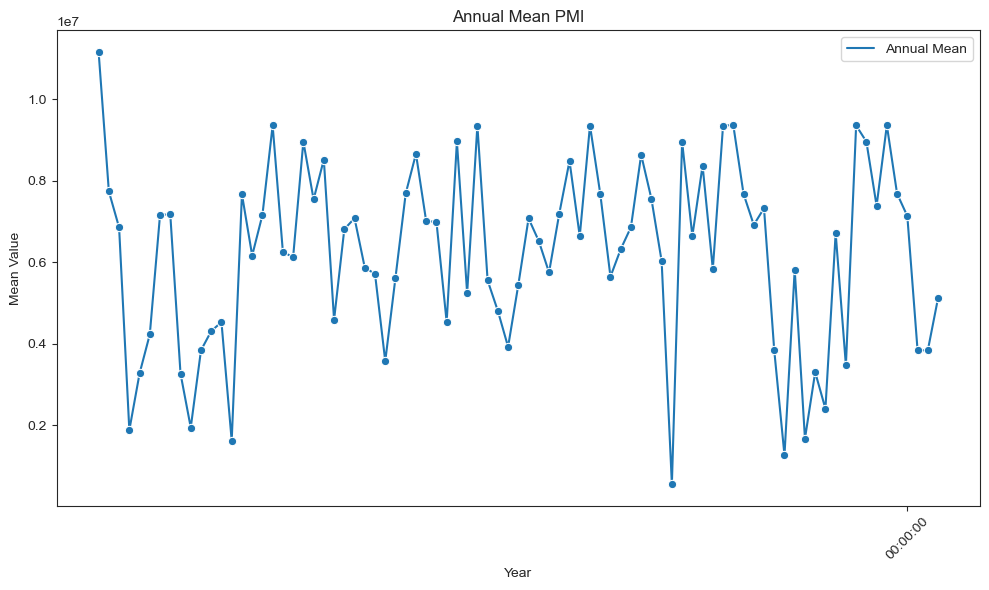

6217167.674750639


In [39]:
df_pmi = compute_annual_means(df, ["DEL_SWP_PMI"], [0])
plot_ts_regular(df_pmi, "Annual Mean PMI")
print(compute_mean(df, ["DEL_SWP_PMI"], [0], months = None))

In [40]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["DEL_SWP_PMI"], [study_index], months=None)
    metrics.append(metric_value)

pmi_results_df = pd.DataFrame(metrics, columns=['Mean Annual SWP M&I Deliveries'])
pmi_results_df

,Mean Annual SWP M&I Deliveries
0,6.217168e+06
1,6.319068e+06
2,6.119181e+06
3,5.752195e+06
4,6.279359e+06
...,...
379,6.315283e+06
380,7.579958e+06
381,7.625680e+06
382,7.357140e+06


##### Average end-of-September reservoir storage for select reservoirs

In [41]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["S_RESTOT"], [study_index], months=[9])
    metrics.append(metric_value)

stot_sep_results_df = pd.DataFrame(metrics, columns=['Reservoir Storage September Mean'])
stot_sep_results_df

,Reservoir Storage September Mean
0,7728.598859
1,7290.456423
2,5821.373962
3,2612.785899
4,7831.523740
...,...
379,4628.648043
380,9478.470040
381,9352.438984
382,7717.188222


##### Average Annual Delta Outflow

In [42]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["NDO"], [study_index], months=None)
    metrics.append(metric_value)

ndo_results_df = pd.DataFrame(metrics, columns=['Delta Outflow Mean'])
ndo_results_df

,Delta Outflow Mean
0,21400.966009
1,21869.875452
2,23499.411659
3,26308.299089
4,21347.138317
...,...
379,27036.267817
380,22557.446145
381,23144.481905
382,24394.867992


##### Fall (Sep-Nov) average salinity, as indicated by X2 distance

In [43]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["X2_PRV"], [study_index], months=[9, 10, 11])
    metrics.append(metric_value)

x2_results_df = pd.DataFrame(metrics, columns=['Fall Average Salinity'])
x2_results_df

,Fall Average Salinity
0,85.543711
1,85.684673
2,85.860079
3,85.883281
4,85.925734
...,...
379,89.312140
380,88.469938
381,89.354612
382,91.457103


##### Mean annual SWP MWD delivery volume

In [44]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["DEL_SWP_MWD"], [study_index], months=None)
    metrics.append(metric_value)

mwd_results_df = pd.DataFrame(metrics, columns=['SWP MWD Delivery Mean'])
mwd_results_df

,SWP MWD Delivery Mean
0,3.947694e+06
1,4.018817e+06
2,3.883165e+06
3,3.600810e+06
4,4.000197e+06
...,...
379,3.992802e+06
380,4.933661e+06
381,4.967129e+06
382,4.775049e+06


In [45]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["DEL_CVP_PSC_N"], [study_index], months=None)
    metrics.append(metric_value)

psc_n_results_df = pd.DataFrame(metrics, columns=['PSC Delivery Mean'])
psc_n_results_df

,PSC Delivery Mean
0,5.755295e+06
1,5.754780e+06
2,5.749434e+06
3,5.513847e+06
4,5.754923e+06
...,...
379,3.636986e+06
380,4.181423e+06
381,4.191905e+06
382,4.172061e+06


In [46]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["DEL_CVP_PAG_N"], [study_index], months=None)
    metrics.append(metric_value)

pag_n_results_df = pd.DataFrame(metrics, columns=['NOD AG Delivery Mean'])
pag_n_results_df

,NOD AG Delivery Mean
0,968240.131983
1,987502.169896
2,744264.222077
3,86056.430471
4,964388.520627
...,...
379,735669.689995
380,886675.495407
381,890197.074804
382,885366.176931


In [47]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["DEL_CVP_PAG_S"], [study_index], months=None)
    metrics.append(metric_value)

pag_s_results_df = pd.DataFrame(metrics, columns=['SOD AG Delivery Mean'])
pag_s_results_df

,SOD AG Delivery Mean
0,4.294433e+06
1,4.888192e+06
2,4.382069e+06
3,1.891319e+06
4,4.275588e+06
...,...
379,4.136546e+06
380,4.433803e+06
381,4.469794e+06
382,4.478009e+06


In [48]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["DEL_CVP_PRF_S"], [study_index], months=None)
    metrics.append(metric_value)

prf_s_results_df = pd.DataFrame(metrics, columns=['SOD Refuge Delivery Mean'])
prf_s_results_df

,SOD Refuge Delivery Mean
0,996847.709451
1,997333.242240
2,997333.242240
3,997285.008361
4,996847.709451
...,...
379,990617.472358
380,986296.473246
381,992416.046107
382,994066.386180


In [49]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["S_RESTOT"], [study_index], months=[4])
    metrics.append(metric_value)

stot_apr_results_df = pd.DataFrame(metrics, columns=['Reservoir Storage April Mean'])
stot_apr_results_df

,Reservoir Storage April Mean
0,10582.273994
1,9907.260515
2,8120.973132
3,4559.038066
4,10637.140337
...,...
379,6157.375562
380,11561.803660
381,11279.924554
382,9421.039017


In [53]:
metrics = []

for study_index in np.arange(0, 384):
    metric_value = compute_mean(df, ["D_TOT"], [study_index], months=None)
    metrics.append(metric_value)

d_tot_results_df = pd.DataFrame(metrics, columns=['Banks & Jones Export Mean'])

In [58]:
all_results_df = pd.concat([ndo_results_df, x2_results_df, d_tot_results_df, stot_apr_results_df, stot_sep_results_df, mwd_results_df, 
                            psc_n_results_df, pag_s_results_df, pag_n_results_df, prf_s_results_df], axis = 1)
all_results_df

,Delta Outflow Mean,Fall Average Salinity,Banks & Jones Export Mean,Reservoir Storage April Mean,Reservoir Storage September Mean,SWP MWD Delivery Mean,PSC Delivery Mean,SOD AG Delivery Mean,NOD AG Delivery Mean,SOD Refuge Delivery Mean
0,21400.966009,85.543711,441.380773,10582.273994,7728.598859,3.947694e+06,5.755295e+06,4.294433e+06,968240.131983,996847.709451
1,21869.875452,85.684673,433.264366,9907.260515,7290.456423,4.018817e+06,5.754780e+06,4.888192e+06,987502.169896,997333.242240
2,23499.411659,85.860079,417.666501,8120.973132,5821.373962,3.883165e+06,5.749434e+06,4.382069e+06,744264.222077,997333.242240
3,26308.299089,85.883281,364.185049,4559.038066,2612.785899,3.600810e+06,5.513847e+06,1.891319e+06,86056.430471,997285.008361
4,21347.138317,85.925734,443.934365,10637.140337,7831.523740,4.000197e+06,5.754923e+06,4.275588e+06,964388.520627,996847.709451
...,...,...,...,...,...,...,...,...,...,...
379,27036.267817,89.312140,384.533388,6157.375562,4628.648043,3.992802e+06,3.636986e+06,4.136546e+06,735669.689995,990617.472358
380,22557.446145,88.469938,480.886596,11561.803660,9478.470040,4.933661e+06,4.181423e+06,4.433803e+06,886675.495407,986296.473246
381,23144.481905,89.354612,454.747905,11279.924554,9352.438984,4.967129e+06,4.191905e+06,4.469794e+06,890197.074804,992416.046107
382,24394.867992,91.457103,437.811283,9421.039017,7717.188222,4.775049e+06,4.172061e+06,4.478009e+06,885366.176931,994066.386180


In [59]:
all_results_df.to_csv("Metrics_05_02_2024_v1.csv")

# ERROR I GOTTA FIX: WHY NOT AVERAGING ACROSS VARS?

In [ ]:
create_subset_list(df, ["S_MELON_", "S_OROVL_"])

In [ ]:
df_mi = compute_annual_means(df, ["S_MELON_"], [0])
df_mi

In [ ]:
df_mi = compute_annual_means(df, ["S_OROVL_"], [0])
df_mi

In [ ]:
df_mi = compute_annual_means(df, ["S_OROVL_", "S_MELON_"], [0])
df_mi

### Looping Through All Variables to Create Plots

In [ ]:
#Change var_list however you want here
var_list

In [ ]:
def slice_with_baseline(df, var, study_lst):
    """
    Creates a subset of df based on varname and slices it according to the provided range.
    """
    subset_df = create_subset(df, var)
    df_baseline = subset_df.iloc[:,[0]]
    df_rest = subset_df.iloc[:, study_lst]
    return pd.concat([df_baseline, df_rest], axis = 1)

In [ ]:
def plot_all(df, vars, studies, storyline):
    for var in vars:
        
        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)
        
    
        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)
    
        # Annualized Total
        # plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
    
        # # End of Year TS
        # copy = filter_df.copy()
        # sep_data = copy[copy.index.month.isin([9])]
        # plot_ts(sep_data, pTitle = 'September Total', fTitle = 'Sep_Tot', fPath = fPath)
        # 
        # # April TS
        # apr_data = copy[copy.index.month.isin([4])]
        # plot_ts(apr_data, pTitle = 'April Total', fTitle = 'Apr_Tot', fPath = fPath)
    
        # # Summer Totals
        # thisdata_summer = copy[copy.index.month.isin([6,7,8])]
        # plot_annual_totals(thisdata_summer, pTitle = 'Annual Summer Totals', fTitle = 'Ann_Summ_Tot', fPath = fPath)
    
        # Exceedance
        plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)
    
        # Average MOY
        plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)
    
        # Yearly Totals
        # copy = filter_df.copy()
        # thisdata_yr = copy
        # thisdata_yr["Year"] = thisdata_yr.index.year
        # thisdata_yrtot = thisdata_yr.groupby('Year').sum()
        # plot_ts(thisdata_yrtot, xLab = 'Date', fPath = fPath)

        # # Difference from baseline
        # difference_from_baseline(filter_df, plot_ts)
        # # difference_from_baseline(filter_df, plot_exceedance)
        # # difference_from_baseline(filter_df, plot_moy_averages)
        # difference_from_baseline(filter_df, plot_annual_totals)  

In [ ]:
def plot_all_storage(df, vars, studies, storyline):
    for var in vars:
        
        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)
        
    
        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)
    
        # Annualized Total
        plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
    
        # # End of Year TS
        copy = filter_df.copy()
        sep_data = copy[copy.index.month.isin([9])]
        plot_ts(sep_data, pTitle = 'September Total', fTitle = 'Sep_Tot', fPath = fPath)
        # 
        # # April TS
        apr_data = copy[copy.index.month.isin([4])]
        plot_ts(apr_data, pTitle = 'April Total', fTitle = 'Apr_Tot', fPath = fPath)
    
        # # Summer Totals
        thisdata_summer = copy[copy.index.month.isin([6,7,8])]
        plot_annual_totals(thisdata_summer, pTitle = 'Annual Summer Totals', fTitle = 'Ann_Summ_Tot', fPath = fPath)
    
        # Exceedance
        plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)
    
        # Average MOY
        plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)
    
        # Yearly Totals
        copy = filter_df.copy()
        thisdata_yr = copy
        thisdata_yr["Year"] = thisdata_yr.index.year
        thisdata_yrtot = thisdata_yr.groupby('Year').sum()
        plot_ts(thisdata_yrtot, xLab = 'Date', fPath = fPath)

        # # Difference from baseline
        # difference_from_baseline(filter_df, plot_ts)
        # # difference_from_baseline(filter_df, plot_exceedance)
        # # difference_from_baseline(filter_df, plot_moy_averages)
        # difference_from_baseline(filter_df, plot_annual_totals)  

In [ ]:
var_storage = var_list[0:2]
var_storage

In [ ]:
var_del = var_list[2:4]
var_del

In [ ]:
def get_water_year(date):
    date = pd.to_datetime(date)
    return date.year if date.month < 10 else date.year + 1

In [ ]:
df_shsta = slice_with_baseline(df, "S_SHSTA", [])
df_orovl = slice_with_baseline(df, "S_OROVL", [])
df_shsta.head(2)

In [ ]:
plot_ts(df_shsta, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = '../visualizations')

In [ ]:
df_del_cvp_pag_n = slice_with_baseline(df, "DEL_CVP_PAG_N", [])
df_del_cvp_pag_s = slice_with_baseline(df, "DEL_CVP_PAG_S", [])
df_del_cvp_pag_n.head(2)

In [ ]:
df_wy_filter.head(2)

In [ ]:
wy_value_map = {
    1: "Wet",
    2: "Above normal",
    3: "Below normal",
    4: "Dry",
    5: "Critical",
}

In [ ]:
water_year_type_map = df_wy_filter.set_index("WATERYEAR")
water_year_type_map = water_year_type_map.to_dict()
water_year_type_map_shasta = water_year_type_map["SACindex_0"]
water_year_type_map_orovl = water_year_type_map["SACindex_0"]
water_year_type_map_del_cvp_pag_n = water_year_type_map["SACindex_0"]
water_year_type_map_del_cvp_pag_s = water_year_type_map["SACindex_0"]

In [ ]:
water_year_type_map_shasta = {year: wy_value_map[value] for year, value in water_year_type_map_shasta.items()}

In [ ]:
water_year_type_map_orovl = {year: wy_value_map[value] for year, value in water_year_type_map_orovl.items()}

In [ ]:
water_year_type_map_del_cvp_pag_n = {year: wy_value_map[value] for year, value in water_year_type_map_del_cvp_pag_n.items()}
water_year_type_map_del_cvp_pag_s = {year: wy_value_map[value] for year, value in water_year_type_map_del_cvp_pag_s.items()}

In [ ]:
df_shsta['Water Year'] = df_shsta.index.map(get_water_year)
df_orovl['Water Year'] = df_orovl.index.map(get_water_year)
df_del_cvp_pag_n['Water Year'] = df_del_cvp_pag_n.index.map(get_water_year)
df_del_cvp_pag_s['Water Year'] = df_del_cvp_pag_s.index.map(get_water_year)

df_shsta['Water Year Type'] = df_shsta["Water Year"].map(water_year_type_map_shasta)
df_orovl['Water Year Type'] = df_orovl["Water Year"].map(water_year_type_map_orovl)
df_del_cvp_pag_n['Water Year Type'] = df_del_cvp_pag_n["Water Year"].map(water_year_type_map_del_cvp_pag_n)
df_del_cvp_pag_s['Water Year Type'] = df_del_cvp_pag_s["Water Year"].map(water_year_type_map_del_cvp_pag_s)

df_shsta = df_shsta.drop(columns = ["Water Year"], axis=1)
df_orovl = df_orovl.drop(columns = ["Water Year"], axis=1)
df_del_cvp_pag_n = df_del_cvp_pag_n.drop(columns = ["Water Year"], axis=1)
df_del_cvp_pag_s = df_del_cvp_pag_s.drop(columns = ["Water Year"], axis=1)

df_shsta.head(5)

In [ ]:
def plot_ts_wy(df, titlelabel = '', fPath = '../visualizations', pSave = True):
    """
    Plots time series data for each water year type on the same graph.
    """

    plt.figure(figsize=(10, 6))  
    
    year_types = df["Water Year Type"].unique()

    for year_type in year_types:
        subset = df[df["Water Year Type"] == year_type]
        plt.plot(subset.index, subset.iloc[:, [0]], label=year_type)

    plt.title('Time Series by Water Year Type'+' '+titlelabel)
    plt.xlabel('Date')
    plt.ylabel("Storage (TAF)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout() 
    if pSave:
        plt.savefig(f'{fPath}/TS_WY_{titlelabel}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)

    plt.show()

In [ ]:
def plot_moy_wy(df, titlelabel = '', fPath = '../visualizations', pSave = True):
    """
    Plots the month-of-year averages for each water year type.
    """
    
    df['Month'] = df.index.month
    df['Water Year Type'] = df.iloc[:, 1]  
    df_moy = df.groupby(['Month', 'Water Year Type']).mean().reset_index()

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    water_year_types = df_moy['Water Year Type'].unique()
    for wy_type in water_year_types:
        subset = df_moy[df_moy['Water Year Type'] == wy_type]
        sns.lineplot(x='Month', y=df.columns[0], data=subset, label=wy_type)

    plt.title('Month-of-Year Averages by Water Year Type'+' '+titlelabel)
    plt.xlabel('Month')
    plt.ylabel('Average Value')
    plt.legend(title='Water Year Type')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.tight_layout()
    if pSave:
        plt.savefig(f'{fPath}/MoY_WY_{titlelabel}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
    plt.show()

In [ ]:
def plot_exceedance_wy(df, titlelabel = '', fPath = '../visualizations', pSave = True):
    """
    Plots an exceedance graph across different water year types.
    """
    wy_types = df['Water Year Type'].unique()
    
    plt.figure(figsize=(12, 6))
    
    for wy_type in wy_types:
        subset = df[df['Water Year Type'] == wy_type]
        
        df_ex = csPlots.single_exceed(subset, subset.columns[0])
        sns.lineplot(x=df_ex.index, y=df_ex.columns[0], data=df_ex, label=wy_type)
    
    plt.title('Exceedance by Water Year Type'+' '+titlelabel)
    plt.xlabel('Exceedance Probability')
    plt.ylabel('Value')
    plt.legend(title='Water Year Type')
    plt.tight_layout()
    if pSave:
        plt.savefig(f'{fPath}/Exc_WY_{titlelabel}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
    plt.show()

In [ ]:
def plot_annualized_wy(df, titlelabel = '', fPath = '../visualizations', pSave = True):
    """
    Plots annualized calculation results across different water year types.
    """
    wy_types = df['Water Year Type'].unique()
    
    plt.figure(figsize=(12, 6))
    
    for wy_type in wy_types:
        subset = df[df['Water Year Type'] == wy_type]
        
        with redirect_stdout(open(os.devnull, 'w')):
        
            df_ann = csPlots.annualize(subset.loc[:, [df.columns[0]]])

            sns.lineplot(x=df_ann.index, y=df_ann.columns[0], data=df_ann, label=wy_type)
    
    plt.title('Annualized Values by Water Year Type'+' '+titlelabel)
    plt.xlabel('Year')
    plt.ylabel('Annualized Value')
    plt.legend(title='Water Year Type')
    plt.tight_layout()
    if pSave:
        plt.savefig(f'{fPath}/Ann_WY_{titlelabel}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
    plt.show()

In [ ]:
def plot_boxplots_wy(df, titlelabel='', pSave = True):
    """
    Creates boxplots for a specified value column, grouped by water year type.
    """
    
    df['Water Year Type'] = pd.Categorical(df['Water Year Type'], categories=df['Water Year Type'].unique(), ordered=True)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Water Year Type', y=df.columns[0], data=df)

    plt.title(f'Boxplots by Water Year Type {titlelabel}')
    plt.xlabel('Water Year Type')
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    if pSave:
        plt.savefig(f'{fPath}/Box_WY_{titlelabel}.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
    plt.show()


In [ ]:
#plot_ts_wy(df_shsta, 'Shasta')

In [ ]:
#plot_ts_wy(df_orovl, 'Oroville')

In [ ]:
plot_moy_wy(df_shsta, 'Shasta')

In [ ]:
plot_moy_wy(df_orovl, 'Oroville')

In [ ]:
#plot_annualized_wy(df_shsta, 'Shasta')

In [ ]:
#plot_annualized_wy(df_orovl, 'Oroville')

In [ ]:
# April TS
copy = df_shsta.copy()
apr_shsta = copy[copy.index.month.isin([4])]
#plot_ts_wy(apr_shsta, 'Shasta April Storage')

In [ ]:
plot_exceedance_wy(apr_shsta, 'Shasta April Storage')

In [ ]:
copy = df_shsta.copy()
sep_shsta = copy[copy.index.month.isin([9])]
#plot_ts_wy(sep_shsta, 'Shasta September Storage')

In [ ]:
plot_exceedance_wy(sep_shsta, 'Shasta September Storage')

In [ ]:
# April TS
copy = df_orovl.copy()
apr_orovl = copy[copy.index.month.isin([4])]
#plot_ts_wy(apr_orovl, 'Oroville April Storage')

In [ ]:
plot_exceedance_wy(apr_orovl, 'Oroville September Storage')

In [ ]:
copy = df_orovl.copy()
sep_orovl = copy[copy.index.month.isin([9])]
#plot_ts_wy(sep_orovl, 'Oroville September Storage')

In [ ]:
plot_exceedance_wy(sep_orovl, 'Oroville September Storage')

In [ ]:
plot_moy_wy(df_del_cvp_pag_n, 'del_cvp_pag_n')

In [ ]:
plot_moy_wy(df_del_cvp_pag_s, 'del_cvp_pag_s')

In [ ]:
plot_exceedance_wy(df_del_cvp_pag_n, 'del_cvp_pag_n')

In [ ]:
plot_exceedance_wy(df_del_cvp_pag_s, 'del_cvp_pag_s')

In [ ]:
plot_boxplots_wy(df_shsta, "Shasta")

In [ ]:
plot_boxplots_wy(df_orovl, "Orovl")

In [ ]:
plot_boxplots_wy(df_del_cvp_pag_s, "Del_cvp_pag_s")

In [ ]:
plot_boxplots_wy(df_del_cvp_pag_n, "Del_cvp_pag_n")

# Past Plots Below

In [ ]:
plot_all_storage(df, var_storage, [], 'Baseline')

In [ ]:
def plot_all_ndo(df, vars, studies, storyline):
    for var in vars:

        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)


        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

        # Annualized Total
        plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)

        # # End of Year TS
        copy = filter_df.copy()
        sep_data = copy[copy.index.month.isin([9])]
        plot_ts(sep_data, pTitle = 'September Total', fTitle = 'Sep_Tot', fPath = fPath)
        #
        # # April TS
        apr_data = copy[copy.index.month.isin([4])]
        plot_ts(apr_data, pTitle = 'April Total', fTitle = 'Apr_Tot', fPath = fPath)

        # # Summer Totals
        thisdata_summer = copy[copy.index.month.isin([6,7,8])]
        plot_annual_totals(thisdata_summer, pTitle = 'Annual Summer Totals', fTitle = 'Ann_Summ_Tot', fPath = fPath)

        # Exceedance
        plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

        # Average MOY
        plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)

        # Yearly Totals
        copy = filter_df.copy()
        thisdata_yr = copy
        thisdata_yr["Year"] = thisdata_yr.index.year
        thisdata_yrtot = thisdata_yr.groupby('Year').sum()
        plot_ts(thisdata_yrtot, xLab = 'Date', fPath = fPath)

        # # Difference from baseline
        # difference_from_baseline(filter_df, plot_ts)
        # # difference_from_baseline(filter_df, plot_exceedance)
        # # difference_from_baseline(filter_df, plot_moy_averages)
        # difference_from_baseline(filter_df, plot_annual_totals)

In [ ]:
var_list_ndo = ["NDO"]
var_list_ndo

In [ ]:
plot_all_ndo(df, var_list_ndo, [], "NDO EDA")

### Storyline 1 - Natural Flows

##### Single Strategy

In [ ]:
var_list

In [ ]:
var_list_storage = var_list[:3]
var_list_storage

In [ ]:
var_list_delivery = var_list[3:6]
var_list_delivery

In [ ]:
var_list_c_vars = var_list[7:9]
var_list_c_vars

##### C_VARS

In [ ]:
def plot_all(df, vars, studies, storyline):
    for var in vars:

        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)


        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

        # Average MOY
        plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)

        # January Exceedance
        copy = filter_df.copy()
        jan_data = copy[copy.index.month.isin([1])]
        plot_exceedance(jan_data, month="January", xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

        # May Exceedance
        copy = filter_df.copy()
        may_data = copy[copy.index.month.isin([5])]
        plot_exceedance(may_data, month="May", xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

        # October Exceedance
        copy = filter_df.copy()
        oct_data = copy[copy.index.month.isin([10])]
        plot_exceedance(oct_data, month="October", xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath) 

In [ ]:
study_lst = [1, 2, 3]

In [ ]:
plot_all(df, var_list_c_vars, study_lst, "Storyline #1 Single Strategy")

##### Combination Strategy

In [ ]:
study_lst = [2, 14, 302]

In [ ]:
plot_all(df, var_list_c_vars, study_lst, "Storyline #1 Combination Strategy")

##### Storage

In [ ]:
def plot_all(df, vars, studies, storyline):
    for var in vars:

        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)


        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

        # April Exceedance
        copy = filter_df.copy()
        apr_data = copy[copy.index.month.isin([4])]
        plot_exceedance(apr_data, month="April", xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

        # September Exceedance
        copy = filter_df.copy()
        sep_data = copy[copy.index.month.isin([9])]
        plot_exceedance(sep_data, month="September", xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

In [ ]:
study_lst = [1, 2, 3]

In [ ]:
plot_all(df, var_list_storage, study_lst, "Storyline #1 Single Strategy")

##### Combination Strategy

In [ ]:
study_lst = [2, 14, 302]

In [ ]:
plot_all(df, var_list_storage, study_lst, "Storyline #1 Combination Strategy")

##### Storyline #2 Single Strategy

In [ ]:
study_lst = [32, 64]

In [ ]:
plot_all(df, var_list_storage, study_lst, "Storyline #2 Single Strategy")

##### Storyline #2 Combination Strategy

In [ ]:
study_lst = [64, 80, 368]

In [ ]:
plot_all(df, var_list_storage, study_lst, "Storyline #2 Combination Strategy")

##### Storyline #3 Single Strategy

In [ ]:
study_lst = [16]

In [ ]:
plot_all(df, var_list_storage, study_lst, "Storyline #3 Single Strategy")

##### Storyline #3 Combination Strategy

In [ ]:
study_lst = [16, 80, 210]

In [ ]:
plot_all(df, var_list_storage, study_lst, "Storyline #3 Combination Strategy")

##### Deliveries

In [ ]:
def plot_all(df, vars, studies, storyline):
    for var in vars:

        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)


        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

        #Exceedance
        plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

In [ ]:
study_lst = [1, 2, 3]

In [ ]:
plot_all(df, var_list_delivery, study_lst, "Storyline #1 Single Strategy")

##### Combination Strategy

In [ ]:
study_lst = [2, 14, 302]

In [ ]:
plot_all(df, var_list_delivery, study_lst, "Storyline #1 Combination Strategy")

##### Scenario #2 Single Strategy

In [ ]:
study_lst = [32, 64]

In [ ]:
plot_all(df, var_list_delivery, study_lst, "Storyline #2 Single Strategy")

##### Storyline #2 Combination Strategy

In [ ]:
study_lst = [64, 80, 368]

In [ ]:
plot_all(df, var_list_delivery, study_lst, "Storyline #2 Combination Strategy")

##### Strategy #3 Single Strategy

In [ ]:
study_lst = [16]

In [ ]:
var_list_delivery = var_list[3:7]
var_list_delivery

In [ ]:
plot_all(df, var_list_delivery, study_lst, "Storyline #3 Single Strategy")

##### Storyline 3 Combination Strategy

In [ ]:
study_lst = [16, 80, 210]

In [ ]:
plot_all(df, var_list_delivery, study_lst, "Storyline #3 Combination Strategy")

##### NDO

In [ ]:
study_lst = [32, 64]

In [ ]:
var_list_ndo = [var_list[9]]
var_list_ndo

In [ ]:
def plot_all(df, vars, studies, storyline):
    for var in vars:

        fPath = f"../visualizations/{storyline}/{var}"
        if not os.path.exists(fPath):
            os.makedirs(fPath, exist_ok=True)


        filter_df = slice_with_baseline(df, var, studies)

        # Regular TS
        plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

        #Exceedance
        plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

In [ ]:
plot_all(df, var_list_ndo, study_lst, "Storyline #2 Single Strategy")

##### Storyline #2 Combination Strategy

In [ ]:
study_lst = [64, 80, 368]

In [ ]:
plot_all(df, var_list_ndo, study_lst, "Storyline #2 Combination Strategy")

##### Storyline #3 Single Strategy 

In [ ]:
study_lst = [16]

In [ ]:
plot_all(df, var_list_ndo, study_lst, "Storyline #3 Single Strategy")

##### Storyline #3 Combination Strategy

In [ ]:
study_lst = [16, 80, 210]

In [ ]:
plot_all(df, var_list_ndo, study_lst, "Storyline #3 Combination Strategy")

### Unused Code

In [ ]:
gi# def preprocess_data(df, addsl=False):
#     dvar_list = []
#     combined_df = pnd.DataFrame()
#     
#     for i, r in df.iterrows():
#         dvar_list.append(f'/{r["DSS Part B"]}/{r["DSS Part C"]}/')
# 
#     for study_name, launch_name, alias_name in zip(study_names, launch_names, alias):
# 
#         launchFP_study = os.path.join(launch_base_directory, study_name)
#         launchFP = os.path.join(launchFP_study, launch_name)
#         print(launchFP)
#         
#         # Create a python "calsim" object
#         thiscs3 = cs3.calsim(launchFP=launchFP, csvers=3, reorg=True)
# 
#         # Retrieve the DSS data variables from the DSS file
#         thiscs3.DVdata.getDVts(filter=dvar_list)
# 
#         df = thiscs3.DVdata.DVtsDF.copy(deep=True)
#         
#         # if storage add the 2 variables to create a new one
#         # Add S_SLSCVP and S_SLSWP into S_SLTOT
# 
#         if addsl:
#             df[('CALLITE', 'S_SLTOT', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,[('CALLITE', 'S_SLCVP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'),('CALLITE', 'S_SLSWP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')]].sum(axis=1)
#       
#         new_columns = [(col[0], f'{col[1]}_{alias_name}', *col[2:]) if len(col) > 1 else (col[0], '') for col in df.columns]
#         df.columns = pnd.MultiIndex.from_tuples(new_columns)
#         df.columns.names = ['A', 'B', 'C', 'D', 'E', 'F', 'Units']
#         combined_df = pnd.concat([combined_df, df], axis=1)
#     
#     return combined_df